In [1]:
import json
import os
import anndata as ad
import mudata as md
import muon as mu

/home/thihanh/miniconda3/envs/myenv/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/thihanh/miniconda3/envs/myenv/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/thihanh/miniconda3/envs/myenv/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/thihanh/miniconda3/envs/myenv/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/thihanh/miniconda3/envs/myenv/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: 

In [ ]:
from dataloader import DataLoader
from mofa_model import MOFA_Model
#myenv: pip install mofapy2

# Testing multiple file types

In [ ]:
# Loading config file
with open("config.json", "r") as f:
    data_config = json.load(f).get("file_1")
    data_dir = data_config.get("data_path")
    filename= data_config.get("file_name")
    isPreprocessed=data_config.get("is_preprocessed")

my_data = os.path.join(data_dir, filename)
print(my_data)

/media/gambino/students_workdir/thihanh/IBP/data/GSM5123952_multiVI_tea_filtered_feature_bc_matrix.h5


: 

In [ ]:
# import muon as mu
# mudata = mu.read_10x_mtx(path="/media/gambino/students_workdir/thihanh/IBP/data/DOGMA_multiVI_RNA_ATAC/", extended=True)
# print(mudata)              
# Error when loading as separated modality for preprocessing -> fuse mudata with 0 observation? DOGMA-seq

MuData object with n_obs × n_vars = 11868 × 98139
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	11868 x 36601
      var:	'gene_ids', 'feature_types'
    atac:	11868 x 61538
      var:	'gene_ids', 'feature_types'


/home/thihanh/miniconda3/envs/myenv/lib/python3.11/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/thihanh/miniconda3/envs/myenv/lib/python3.11/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


: 

In [ ]:
# Dataloader
rna = DataLoader(file_path=my_data, modality="rna", isProcessed=isPreprocessed).preprocessing()
atac = DataLoader(file_path=my_data, modality="atac", isProcessed=isPreprocessed).preprocessing()
adt = DataLoader(file_path="/media/gambino/students_workdir/thihanh/IBP/data/GSM5123952_multiVI_tea_adt_counts.csv.gz", modality="adt", isProcessed=False).preprocessing()
print(rna)
print(atac)
print(adt)

mod = ["rna", "atac", "adt"]
ann = [rna, atac, adt]
fuse = DataLoader().fuse_mudata(list_anndata=ann, list_modality=mod)
print(fuse)


/home/thihanh/miniconda3/envs/myenv/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/thihanh/miniconda3/envs/myenv/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Added `interval` annotation for features from /media/gambino/students_workdir/thihanh/IBP/data/GSM5123952_multiVI_tea_filtered_feature_bc_matrix.h5


/home/thihanh/miniconda3/envs/myenv/lib/python3.11/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/thihanh/miniconda3/envs/myenv/lib/python3.11/site-packages/mudata/_core/mudata.py:915: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(
/home/thihanh/miniconda3/envs/myenv/lib/python3.11/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push

ValueError: Value passed for key 'counts' is of incorrect shape. Values of layers must match dimensions ('obs', 'var') of parent. Value had shape (8512, 36601) while it should have had (7626, 36601).

: 

In [ ]:
# del rna, atac, adt, fuse

: 

# Prostate

In [ ]:
fud = DataLoader(file_path="/media/gambino/students_workdir/thihanh/IBP/h5mu_file/mdata_preprocessed_final_filtered_morph_recons_latent.h5mu").read_mudata()
print(fud)

KeyboardInterrupt: 

: 

In [ ]:
my_model = MOFA_Model(data_dir=data_dir, dataset=fud)
print(my_model.data_dir)
print(my_model.dataset)

Initializing MOFA+ Model
/media/gambino/students_workdir/thihanh/IBP/data/
MuData object with n_obs × n_vars = 42475 × 31972
  obs:	'sample', 'tissue', 'patient', 'ann', 'imagerow', 'imagecol', 'new_ann', 'batch', 'extra_categorical_covs', 'mod_id'
  obsm:	'z1_p', 'z1_p_mod', 'z1_s', 'z2_p', 'z2_p_mod', 'z2_s', 'z3_p', 'z3_p_mod', 'z3_s', 'z_mvae'
  3 modalities
    rna:	42475 x 18950
      obs:	'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'size_factors', 'sample', 'type', 'patient', 'ann', 'new_ann', 'tissue', 'imagerow', 'imagecol', 'mod_id', 'batch_id', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var'
      uns:	'_scvi'
      obsm:	'spatial'
 

: 

: 

In [ ]:
#my_model.train(gpu_mode=False) 
# -> error: outfile = os.path.join(self.data_dir, f"mofa_{self.dataset}.hdf5") -> mu.tl.mofa(self.dataset, n_factors=n_factors, outfile=outfile
my_model.train(outfile="mofa_tea.hdf5", gpu_mode=False)

Training MOFA+ Model
Training MOFA+ Model

        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=42475 samples and D=18950 features...
Loaded view='msi' group='group1' with N=42475 samples and D=12510 features...
Loaded view='morph' group='group1' with N=42475 samples and D=512 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Det

: 

In [ ]:
print(fud)

MuData object with n_obs × n_vars = 42475 × 31972
  obs:	'sample', 'tissue', 'patient', 'ann', 'imagerow', 'imagecol', 'new_ann', 'batch', 'extra_categorical_covs', 'mod_id'
  uns:	'mofa', 'tissue_colors', 'ann_colors', 'mod_id_colors', 'new_ann_colors'
  obsm:	'z1_p', 'z1_p_mod', 'z1_s', 'z2_p', 'z2_p_mod', 'z2_s', 'z3_p', 'z3_p_mod', 'z3_s', 'z_mvae', 'X_mofa', 'X_mofa_umap', 'X_umap'
  varm:	'LFs'
  3 modalities
    rna:	42475 x 18950
      obs:	'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'size_factors', 'sample', 'type', 'patient', 'ann', 'new_ann', 'tissue', 'imagerow', 'imagecol', 'mod_id', 'batch_id', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_l

: 

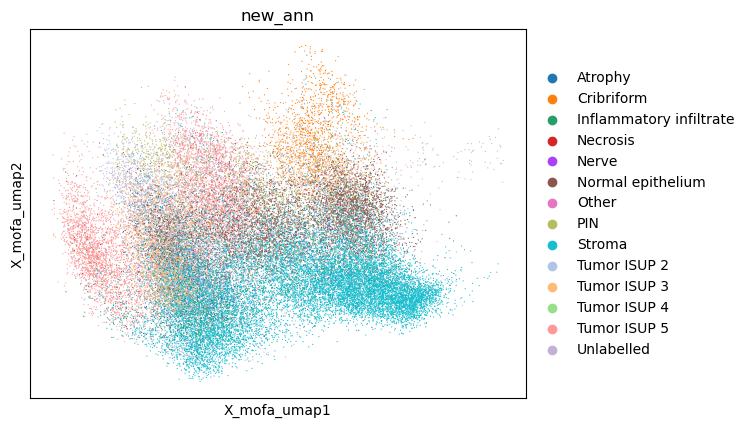

: 

In [ ]:
#my_model.save_latent() ->same error

#my_model.umap(filename="tea") -> error: mu.pl.embedding(self.dataset, basis="X_mofa_umap", color=["rna:celltype", "atac:celltype"], save=filename)
import muon as mu
#fud.obsm["X_mofa_umap"] = fud.obsm["X_mofa"]
mu.pl.embedding(fud, basis="X_mofa_umap", color="new_ann")


# Annotated Data

In [3]:
rna = DataLoader(file_path="/media/gambino/students_workdir/thihanh/IBP/data/10x-Multiome-Pbmc10k-RNA.h5ad", modality="rna", isProcessed=False).preprocessing()
print(rna)

AnnData object with n_obs × n_vars = 9578 × 2000
    obs: 'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'


In [4]:
atac = DataLoader(file_path="/media/gambino/students_workdir/thihanh/IBP/data/10x-Multiome-Pbmc10k-ATAC.h5ad", modality="atac", isProcessed=False).preprocessing()
print(atac)

AnnData object with n_obs × n_vars = 9538 × 15000
    obs: 'domain', 'cell_type', 'n_genes_by_counts', 'total_counts'
    var: 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spectral_eigenvalue', 'log1p', 'hvg'
    obsm: 'X_spectral', 'X_umap'
    layers: 'counts'


In [5]:
mod = ["rna", "atac"]
ann = [rna, atac]
fuse = DataLoader().fuse_mudata(list_anndata=ann, list_modality=mod)
fuse.obs["cell_type"] = rna.obs["cell_type"]


/home/thihanh/miniconda3/envs/myenv/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/thihanh/miniconda3/envs/myenv/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)
/home/thihanh/miniconda3/envs/myenv/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarnin

In [6]:
print(fuse)

MuData object with n_obs × n_vars = 9505 × 17000
  obs:	'cell_type'
  var:	'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
  2 modalities
    rna:	9505 x 2000
      obs:	'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
      var:	'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'counts'
    atac:	9505 x 15000
      obs:	'domain', 'cell_type', 'n_genes_by_counts', 'total_counts'
      var:	'feature_types', 'n_cells_by_counts', 'mean_count

In [ ]:
m_model = MOFA_Model(data_dir="/media/gambino/students_workdir/thihanh/IBP/data/", dataset=fuse)
print(m_model.data_dir)
print(m_model.dataset)

Initializing MOFA+ Model
/media/gambino/students_workdir/thihanh/IBP/data/
MuData object with n_obs × n_vars = 9505 × 17000
  obs:	'cell_type'
  var:	'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
  2 modalities
    rna:	9505 x 2000
      obs:	'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
      var:	'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'counts'
    atac:	9505 x 15000
      obs:	'domain', 'cell_type', 'n_genes_by_counts', 

In [8]:
m_model.train(outfile="mofa_10X_multiome.hdf5", gpu_mode=False)

Training MOFA+ Model
Training MOFA+ Model

        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


Loaded view='rna' group='group1' with N=9505 samples and D=2000 features...
Loaded view='atac' group='group1' with N=9505 samples and D=15000 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (rna): gaussian
- View 1 (atac): gaussian




######################################
## Training the model with seed 1 ##
######################################



Converged!



#######################
## Training finished ##
#######################


Saving model in mofa_10X_multiome.hdf5...
Saved MOFA embeddings in .obsm['X_mofa'] slot and their loadings in .varm['LFs'].
Model saved at: mofa_10X_multiome.hdf5


In [9]:
print(fuse)

MuData object with n_obs × n_vars = 9505 × 17000
  obs:	'cell_type'
  var:	'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
  uns:	'mofa'
  obsm:	'X_mofa'
  varm:	'LFs'
  2 modalities
    rna:	9505 x 2000
      obs:	'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
      var:	'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg'
      layers:	'counts'
    atac:	9505 x 15000
      obs:	'domain', 'cell_type', 'n_genes_by_counts', 'total_counts'
      var:	'fea

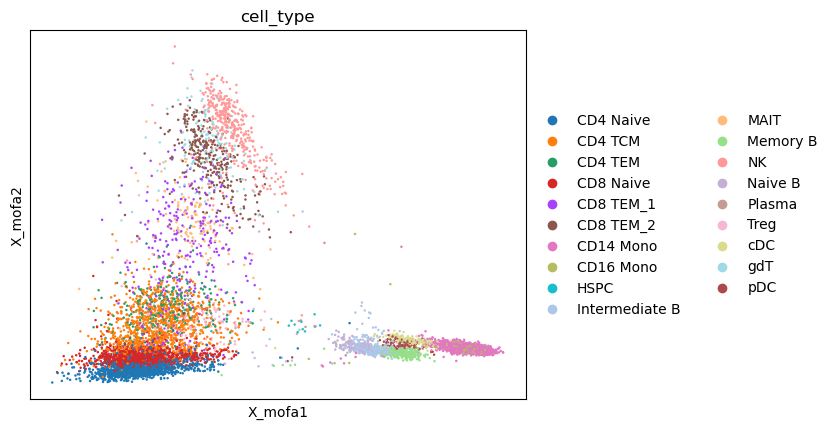

In [10]:
import muon as mu
fuse.obsm["X_umap"] = fuse.obsm["X_mofa"]
mu.pl.embedding(fuse, basis="X_mofa", color="cell_type")

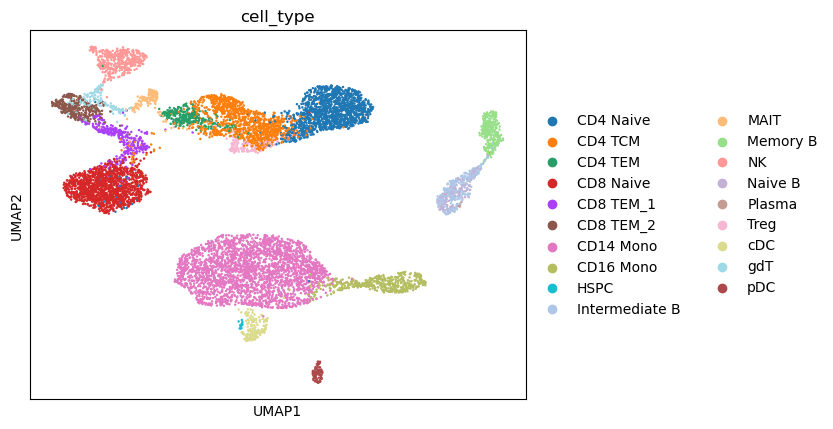

In [11]:
import scanpy as sc
sc.pp.neighbors(fuse, use_rep="X_mofa")
sc.tl.umap(fuse)
sc.pl.umap(fuse ,color="cell_type")